In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("TrainingSet (IR - 7).csv")
#Dtrain = Dtrain.iloc[:,0:4].values
Dtest = pd.read_csv("TestingSet (IR - 7).csv")

In [3]:
Dtrain["Bearing"].value_counts()

Normal                 96896
Inner Race (0.007")    96896
Name: Bearing, dtype: int64

In [4]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Normal                 50.0
Inner Race (0.007")    50.0
Name: Bearing, dtype: float64

In [5]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))



In [9]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [10]:
import tensorflow as tf
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'elu'

In [11]:
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(6,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(6,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'] )

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=100

In [12]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 184102 samples, validate on 9690 samples
Epoch 1/100
184102/184102 [==============================] - 8s 44us/step - loss: 0.0212 - accuracy: 0.7869 - val_loss: 0.0041 - val_accuracy: 0.4711
Epoch 2/100
184102/184102 [==============================] - 7s 37us/step - loss: 0.0014 - accuracy: 0.7641 - val_loss: 0.0020 - val_accuracy: 0.5270
Epoch 3/100
184102/184102 [==============================] - 7s 36us/step - loss: 9.9434e-04 - accuracy: 0.8037 - val_loss: 0.0020 - val_accuracy: 0.6741
Epoch 4/100
184102/184102 [==============================] - 7s 37us/step - loss: 9.7112e-04 - accuracy: 0.8509 - val_loss: 0.0019 - val_accuracy: 0.5167
Epoch 5/100
184102/184102 [==============================] - 6s 35us/step - loss: 9.6014e-04 - accuracy: 0.8377 - val_loss: 0.0020 - val_accuracy: 0.4766
Epoch 6/100
184102/184102 [==============================] - 7s 36us/step - loss: 9.5320e-04 - accuracy: 0.8264 - val_loss: 0.0019 - val_accuracy: 0.8190
Epoch 7/100
184102/184102 [=======

184102/184102 [==============================] - 7s 37us/step - loss: 7.4093e-06 - accuracy: 0.7917 - val_loss: 9.2529e-06 - val_accuracy: 0.7842
Epoch 53/100
184102/184102 [==============================] - 7s 36us/step - loss: 7.2726e-06 - accuracy: 0.7975 - val_loss: 4.8892e-06 - val_accuracy: 0.0856
Epoch 54/100
184102/184102 [==============================] - 7s 36us/step - loss: 7.2156e-06 - accuracy: 0.7921 - val_loss: 3.6948e-06 - val_accuracy: 0.7035
Epoch 55/100
184102/184102 [==============================] - 7s 37us/step - loss: 7.0107e-06 - accuracy: 0.7916 - val_loss: 4.5424e-06 - val_accuracy: 0.6623
Epoch 56/100
184102/184102 [==============================] - 7s 37us/step - loss: 6.9098e-06 - accuracy: 0.7966 - val_loss: 3.2630e-06 - val_accuracy: 0.8127
Epoch 57/100
184102/184102 [==============================] - 7s 36us/step - loss: 6.8154e-06 - accuracy: 0.8001 - val_loss: 6.0949e-06 - val_accuracy: 0.5411
Epoch 58/100
184102/184102 [==============================]

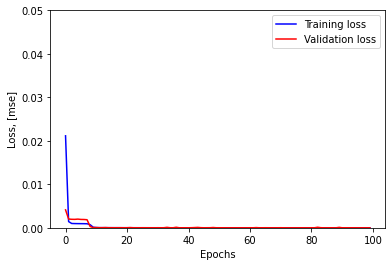

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

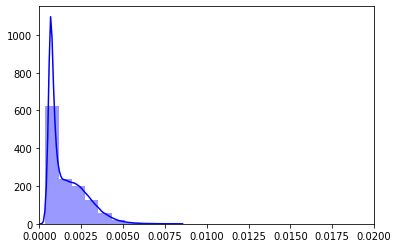

In [14]:
X_pred = model.predict(np.array(X_train))

import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored, bins = 10, kde= True, color = 'blue');
plt.xlim([0.0,.02])
plt.show()

In [15]:
X_pred = model.predict(np.array(X_test))

scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.006
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
13002,0.000910,0.006,False
22845,0.002729,0.006,False
10961,0.001747,0.006,False
15502,0.002616,0.006,False
40374,0.000674,0.006,False
...,...,...,...
41453,0.000926,0.006,False
13961,0.002577,0.006,False
23069,0.001814,0.006,False
40604,0.000605,0.006,False


In [16]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.006
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [17]:
scored_train['Loss_mae'].mean()

0.0016042169871454265

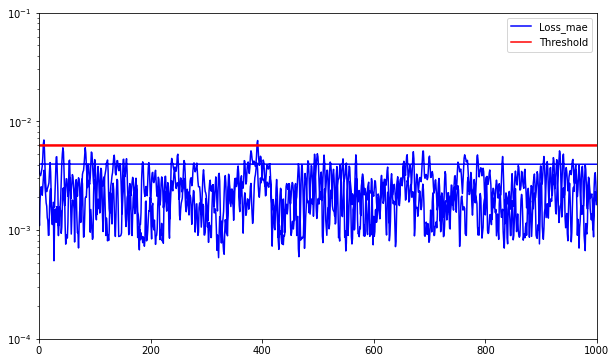

In [18]:
scored.plot(logy=True,  figsize = (10,6), xlim =[0,1000], ylim = [1e-4,1e-1], color = ['blue','red'])

In [23]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.001420,0.006,False
1,0.001100,0.006,False
2,0.001818,0.006,False
3,0.002346,0.006,False
4,0.002505,0.006,False
...,...,...,...
193787,0.006068,0.006,True
193788,0.000520,0.006,False
193789,0.007364,0.006,True
193790,0.000700,0.006,False


In [20]:
scored_train[scored_train['Anomaly'] == True]

,Loss_mae,Threshold,Anomaly
2234,0.006427,0.006,True
2235,0.006676,0.006,True
3023,0.006634,0.006,True
3845,0.006409,0.006,True
3846,0.006240,0.006,True
...,...,...,...
193168,0.007417,0.006,True
193179,0.006437,0.006,True
193778,0.006560,0.006,True
193787,0.006068,0.006,True
